<a href="https://colab.research.google.com/github/Kripaasree/Cardiovascular-disease-prediction/blob/main/Copy_of_CVD_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir("/content/drive/MyDrive/ecg_images")

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['ECG Images of Patient that have abnormal heartbeat (233x12=2796)', 'ECG Images of Patient that have History of MI (172x12=2064)', 'Normal Person ECG Images (284x12=3408)', 'ECG Images of Myocardial Infarction Patients (240x12=2880)']
Types of classes labels found:  4


In [ ]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir("/content/drive/MyDrive/ecg_images" + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [ ]:
# Build a dataframe
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

                                              Labels  \
0  ECG Images of Patient that have abnormal heart...   
1  ECG Images of Patient that have abnormal heart...   
2  ECG Images of Patient that have abnormal heart...   
3  ECG Images of Patient that have abnormal heart...   
4  ECG Images of Patient that have abnormal heart...   

                                               image  
0  dataset_path/ECG Images of Patient that have a...  
1  dataset_path/ECG Images of Patient that have a...  
2  dataset_path/ECG Images of Patient that have a...  
3  dataset_path/ECG Images of Patient that have a...  
4  dataset_path/ECG Images of Patient that have a...  
                                                Labels  \
914  ECG Images of Myocardial Infarction Patients (...   
915  ECG Images of Myocardial Infarction Patients (...   
916  ECG Images of Myocardial Infarction Patients (...   
917  ECG Images of Myocardial Infarction Patients (...   
918  ECG Images of Myocardial Infarction Pa

In [ ]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  919
Labels
Normal Person ECG Images (284x12=3408)                              284
ECG Images of Patient that have abnormal heartbeat (233x12=2796)    233
ECG Images of Myocardial Infarction Patients (240x12=2880)          229
ECG Images of Patient that have History of MI (172x12=2064)         173
Name: count, dtype: int64


In [ ]:
import os
import cv2

path = r"/content/drive/MyDrive/ecg_images"
dataset_path = os.listdir(path)

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = os.path.join(path, i)  # Correct way to join paths
    filenames = os.listdir(data_path)

    for f in filenames:
        img_path = os.path.join(data_path, f)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (im_size, im_size))
            images.append(img)
            labels.append(i)
        else:
            print(f"Warning: Could not read image {img_path}")


In [ ]:
#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255].

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(919, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

['ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
 'ECG Images of Patient that have abnormal heart

In [ ]:
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [ ]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y).toarray()

In [ ]:
Y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.10, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(827, 224, 224, 3)
(827, 4)
(92, 224, 224, 3)
(92, 4)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

NUM_CLASSES = 4
IMG_SIZE = 224

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Base model without top classifier
base_model = EfficientNetB0(include_top=False, weights=None, input_tensor=inputs)

# Custom classification head
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

# Final model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ normalization[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_

 Total params: 4,214,055 (16.08 MB)

 Trainable params: 4,172,032 (15.92 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Recalculate integer labels again to match the class names
int_labels = y_labelencoder.transform(df['Labels'].values)
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(int_labels),
                                     y=int_labels)

# Convert to dictionary format for Keras
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)
hist = model.fit(train_x, train_y,
                 epochs=50,
                 batch_size=16,
                 class_weight=class_weights)  # 👈 Important



Class Weights: {0: np.float64(1.0032751091703056), 1: np.float64(1.3280346820809248), 2: np.float64(0.9860515021459227), 3: np.float64(0.8089788732394366)}
Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 268s 4s/step - accuracy: 0.3409 - loss: 1.4870
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 259s 4s/step - accuracy: 0.5445 - loss: 1.0694
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 217s 4s/step - accuracy: 0.6683 - loss: 0.8190
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 212s 4s/step - accuracy: 0.8150 - loss: 0.5126
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 259s 4s/step - accuracy: 0.8113 - loss: 0.5712
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 265s 4s/step - accuracy: 0.8444 - loss: 0.4341
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.9159 - loss: 0.2750
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.9342 - loss: 0.1878
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.9169 - loss: 0.2762
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.9710 - loss: 

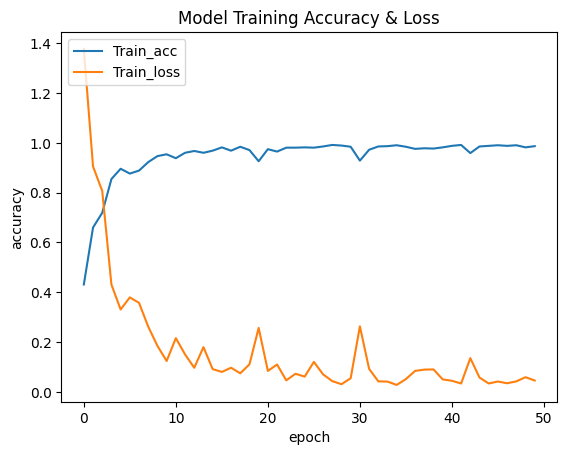

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["loss"])
    plt.title("Model Training Accuracy & Loss")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["Train_acc", "Train_loss"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
preds = model.evaluate(train_x, train_y)
print ("Loss = " + str(preds[0]))
print ("Train Accuracy = " + str(preds[1]))

26/26 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.7642 - loss: 1.2436
Loss = 1.1894692182540894
Train Accuracy = 0.7723971009254456


In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8310 - loss: 0.9889
Loss = 1.013967752456665
Test Accuracy = 0.8260869383811951


In [ ]:
y_pred = model.predict(train_x)
y_pred_classes = np.argmax(y_pred,axis=1)
y_true_classes = np.argmax(train_y,axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step


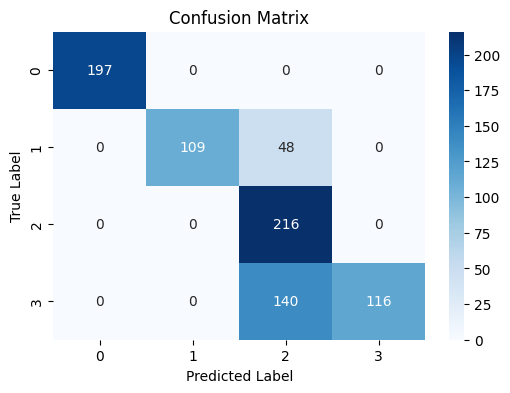

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate the report
report = classification_report(y_true_classes, y_pred_classes)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      0.69      0.82       157
           2       0.53      1.00      0.70       216
           3       1.00      0.45      0.62       256

    accuracy                           0.77       826
   macro avg       0.88      0.79      0.78       826
weighted avg       0.88      0.77      0.77       826



In [ ]:
y_pred1 = model.predict(test_x)
y_pred_classes1 = np.argmax(y_pred1,axis=1)
y_true_classes1 = np.argmax(test_y,axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


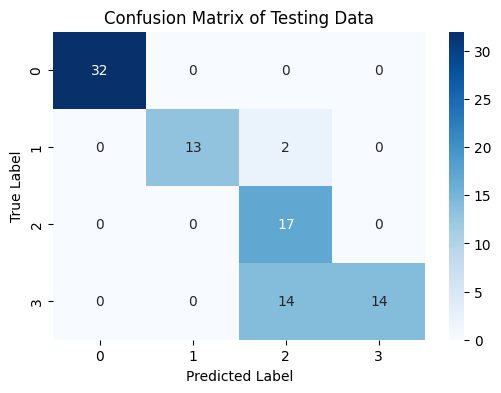

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_classes1, y_pred_classes1)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Testing Data")
plt.show()

In [ ]:
model.save("CardiovasularEfficientB0Final.keras")

In [ ]:
from tensorflow.keras.models import load_model
modelnew = load_model("CardiovasularEfficientB0Final.keras")

Saving HB.jpg to HB.jpg
Selected Image: HB.jpg


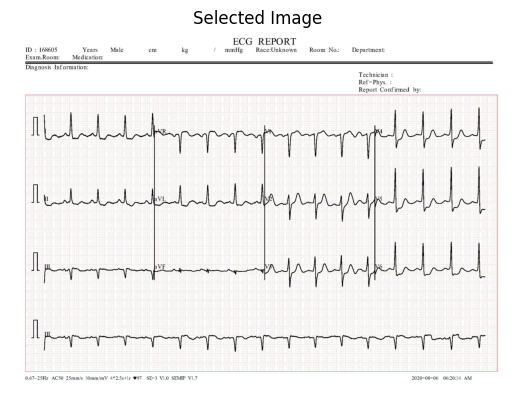

In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from PIL import Image
import io

# Upload file via Colab interface
uploaded = files.upload()

# Get the first uploaded file
for fn in uploaded.keys():
    file_path = fn
    print("Selected Image:", file_path)

    # Preprocess the image
    def preprocess_image(img_path, img_size=224):
        img = image.load_img(img_path, target_size=(img_size, img_size))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0
        return img_array

    img_array = preprocess_image(file_path)

    # Show image
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.title("Selected Image")
    plt.axis("off")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


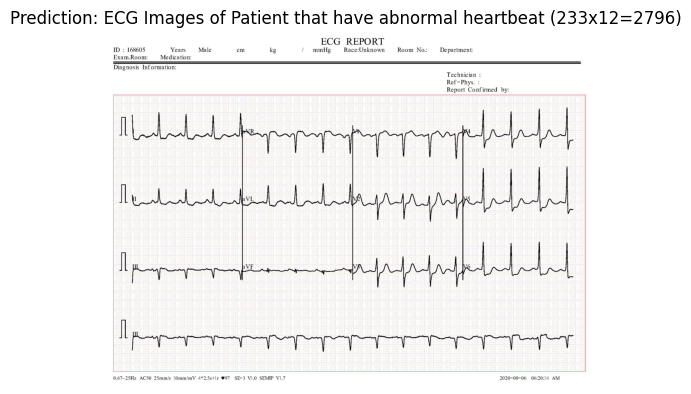

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Make sure to define this path
file_path =  r"/content/drive/MyDrive/HB.jpg"

# Load and preprocess the image
img = cv2.imread(file_path)
if img is None:
    print("Could not load image. Check path:", file_path)
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (224, 224))
    img_input = img_resized.astype('float32') / 255.0
    img_input = np.expand_dims(img_input, axis=0)  # Shape: (1, 224, 224, 3)

    # Predict
    prediction = model.predict(img_input)
    predicted_index = np.argmax(prediction)
    predicted_label = y_labelencoder.inverse_transform([predicted_index])[0]  # decode label

    # Display the image and prediction
    plt.imshow(img_rgb)
    plt.title(f"Prediction: {predicted_label}")
    plt.axis("off")
    plt.show()


In [ ]:
class_names = ['Myocardial Infarction', 'History of MI', 'Abnormal Heartbeat', 'Normal']
# Predict the class
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
predicted_label = class_names[predicted_class_index]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


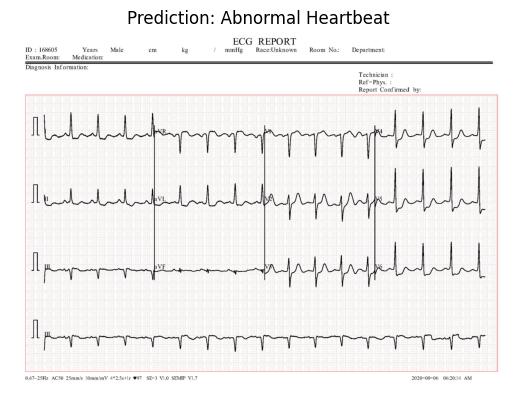

In [ ]:
# Predict the class
prediction = model.predict(img_array)  # img_array must be already preprocessed
predicted_class_index = np.argmax(prediction)
predicted_label = class_names[predicted_class_index]

# Show image with prediction
img = cv2.imread(file_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title(f"Prediction: {predicted_label}")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


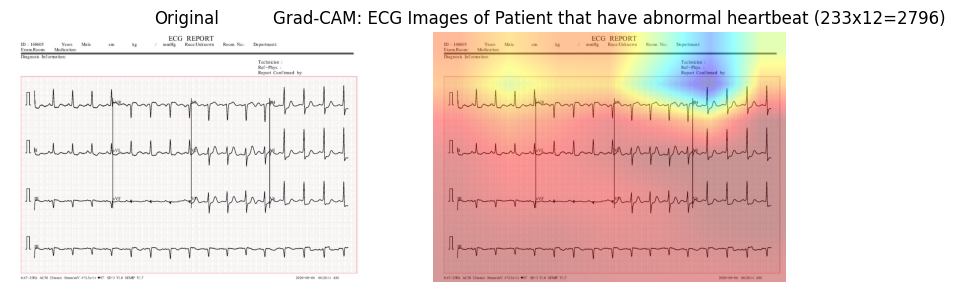

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

def gradcam_visualize(file_path, model, label_encoder, last_conv_layer_name="top_conv"):
    # Step 1: Preprocess the image
    img = cv2.imread(file_path)
    if img is None:
        print(f"❌ Image not found at: {file_path}")
        return
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (224, 224))
    img_input = img_resized.astype('float32') / 255.0
    img_input = np.expand_dims(img_input, axis=0)

    # Step 2: Make prediction
    preds = model.predict(img_input)
    pred_index = np.argmax(preds[0])
    predicted_label = label_encoder.inverse_transform([pred_index])[0]

    # Step 3: Grad-CAM computation
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_input)
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap = heatmap.numpy()

    # Step 4: Overlay heatmap
    heatmap = cv2.resize(heatmap, (img_rgb.shape[1], img_rgb.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap_colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(img_rgb, 0.6, heatmap_colored, 0.4, 0)

    # Step 5: Display
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(overlay)
    plt.title(f"Grad-CAM: {predicted_label}")
    plt.axis("off")

    plt.show()

# Example usage:
# Make sure to replace with your actual file path
file_path =  r"/content/drive/MyDrive/HB.jpg"
gradcam_visualize(file_path, model, y_labelencoder)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


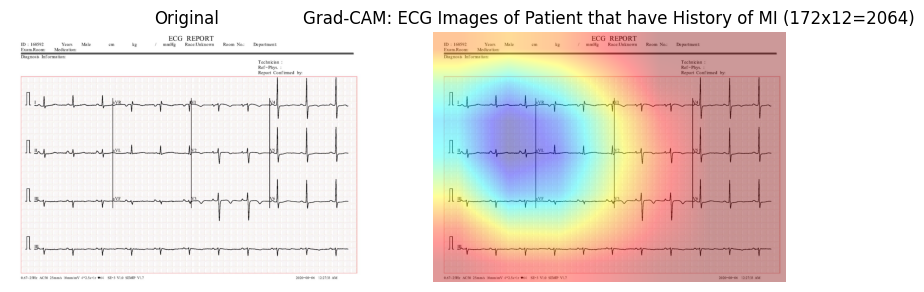

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

def gradcam_visualize(file_path, model, label_encoder, last_conv_layer_name="top_conv"):
    # Step 1: Preprocess the image
    img = cv2.imread(file_path)
    if img is None:
        print(f"❌ Image not found at: {file_path}")
        return
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (224, 224))
    img_input = img_resized.astype('float32') / 255.0
    img_input = np.expand_dims(img_input, axis=0)

    # Step 2: Make prediction
    preds = model.predict(img_input)
    pred_index = np.argmax(preds[0])
    predicted_label = label_encoder.inverse_transform([pred_index])[0]

    # Step 3: Grad-CAM computation
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_input)
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap = heatmap.numpy()

    # Step 4: Overlay heatmap
    heatmap = cv2.resize(heatmap, (img_rgb.shape[1], img_rgb.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap_colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(img_rgb, 0.6, heatmap_colored, 0.4, 0)

    # Step 5: Display
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(overlay)
    plt.title(f"Grad-CAM: {predicted_label}")
    plt.axis("off")

    plt.show()

# Example usage:
# Make sure to replace with your actual file path
file_path =  r"/content/drive/MyDrive/PMI.jpg"
gradcam_visualize(file_path, model, y_labelencoder)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


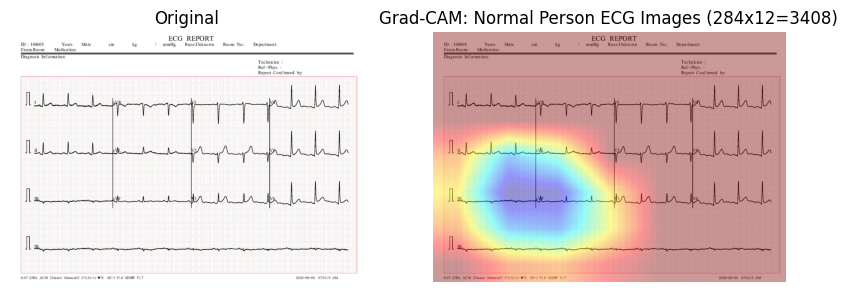

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

def gradcam_visualize(file_path, model, label_encoder, last_conv_layer_name="top_conv"):
    # Step 1: Preprocess the image
    img = cv2.imread(file_path)
    if img is None:
        print(f"❌ Image not found at: {file_path}")
        return
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (224, 224))
    img_input = img_resized.astype('float32') / 255.0
    img_input = np.expand_dims(img_input, axis=0)

    # Step 2: Make prediction
    preds = model.predict(img_input)
    pred_index = np.argmax(preds[0])
    predicted_label = label_encoder.inverse_transform([pred_index])[0]

    # Step 3: Grad-CAM computation
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_input)
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap = heatmap.numpy()

    # Step 4: Overlay heatmap
    heatmap = cv2.resize(heatmap, (img_rgb.shape[1], img_rgb.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap_colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(img_rgb, 0.6, heatmap_colored, 0.4, 0)

    # Step 5: Display
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(overlay)
    plt.title(f"Grad-CAM: {predicted_label}")
    plt.axis("off")

    plt.show()

# Example usage:
# Make sure to replace with your actual file path
file_path =  r"/content/drive/MyDrive/Normal.jpg"
gradcam_visualize(file_path, model, y_labelencoder)
